# k-means clustering silhouette analysis

## SemEval data

In [1]:
import os
# set available gpu's
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [2]:
from data_clustering import text_semeval
from evo_functions import extract_SemEval_data, embed_texts
from data_clustering import apply_tf_idf

/cfs/home/u023967/miniconda3/envs/thesis_env_2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fa9ac19fc10>>
Traceback (most recent call last):
  File "/cfs/home/u023967/miniconda3/envs/thesis_env_2/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


In [5]:
data = extract_SemEval_data(use_data_sorted_by_dq=True)
text_constructor = text_semeval

Used data with already retrieved examples from DATASETS/DATA_QUALITY/SemEval_data_quality.json


In [6]:
texts=[]
for example in data:
    text = text_constructor(example)
    #print(text)
    texts.append(text)

# embed texts
# embeded_texts = embed_texts(texts)
embeded_texts = apply_tf_idf(texts)

[nltk_data] Downloading package punkt to
[nltk_data]     /cfs/home/u023967/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /cfs/home/u023967/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /cfs/home/u023967/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /cfs/home/u023967/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /cfs/home/u023967/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /cfs/home/u023967/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /cfs/home/u023967/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nl

In [7]:
X = embeded_texts

In [ ]:
len(X)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce to 2 dimensions for visualization purposes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the data in the two principal components
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker=".", s=30, lw=0, alpha=0.7, edgecolor="k")

plt.title("Visualization of data in the first two principal components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Apply PCA (adjust n_components as needed)
pca = PCA(n_components=10)  # You can increase this if you want more components
X_pca = pca.fit_transform(X)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Display the explained variance ratio for each component
for i, var in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {var:.2%} of variance explained")

# Plot the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

# Apply PCA to reduce to 2 dimensions for visualization purposes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Set the number of clusters to 2
n_clusters = 3

# Initialize the KMeans clusterer with n_clusters = 2
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(X)

# Calculate the average silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg}")

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)

# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# 1st subplot: Silhouette plot
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the 2 clusters.")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the y-axis labels
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd subplot: Clusters in the PCA-reduced space
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(X_pca[:, 0], X_pca[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

# Plot the cluster centers in the PCA space
centers_pca = pca.transform(clusterer.cluster_centers_)
ax2.scatter(centers_pca[:, 0], centers_pca[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")

for i, c in enumerate(centers_pca):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax2.set_title("Clusters in the PCA-reduced space (2 clusters)")
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")

plt.suptitle("Silhouette analysis for KMeans clustering with 2 clusters", fontsize=14, fontweight="bold")

plt.show()


In [9]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

For n_clusters = 2 The average silhouette_score is : 0.048986957941012044
For n_clusters = 52 The average silhouette_score is : 0.04144204405381804
For n_clusters = 102 The average silhouette_score is : 0.08661659655393754
For n_clusters = 152 The average silhouette_score is : 0.12689536083421302
For n_clusters = 202 The average silhouette_score is : 0.17577370110766924
For n_clusters = 252 The average silhouette_score is : 0.21727523977165955
For n_clusters = 302 The average silhouette_score is : 0.2635899358412457
For n_clusters = 352 The average silhouette_score is : 0.31238018617662944
For n_clusters = 402 The average silhouette_score is : 0.3606167777940728
For n_clusters = 452 The average silhouette_score is : 0.41049405988524446
For n_clusters = 502 The average silhouette_score is : 0.4619666060380668
For n_clusters = 552 The average silhouette_score is : 0.5108807115525748
For n_clusters = 602 The average silhouette_score is : 0.556847311741655
For n_clusters = 652 The average 

/tmp/ipykernel_9428/3715676501.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 1002 The average silhouette_score is : 0.7679026201468754
For n_clusters = 1052 The average silhouette_score is : 0.7432711360081131
For n_clusters = 1102 The average silhouette_score is : 0.7111763791116099
For n_clusters = 1152 The average silhouette_score is : 0.6744730995859001
For n_clusters = 1202 The average silhouette_score is : 0.6377509862097747
For n_clusters = 1252 The average silhouette_score is : 0.5975798828423569
For n_clusters = 1302 The average silhouette_score is : 0.5573912346585949
For n_clusters = 1352 The average silhouette_score is : 0.515523952309098
For n_clusters = 1402 The average silhouette_score is : 0.47356763696212884
For n_clusters = 1452 The average silhouette_score is : 0.43001277369045066
For n_clusters = 1502 The average silhouette_score is : 0.3857506895073542
For n_clusters = 1552 The average silhouette_score is : 0.34104879978614966
For n_clusters = 1602 The average silhouette_score is : 0.29510779295881046
For n_clusters = 1652 

/cfs/home/u023967/miniconda3/envs/thesis_env_2/lib/python3.9/site-packages/sklearn/base.py:1474: ConvergenceWarning: Number of distinct clusters (1816) found smaller than n_clusters (1852). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


For n_clusters = 1852 The average silhouette_score is : 0.08842105168883557


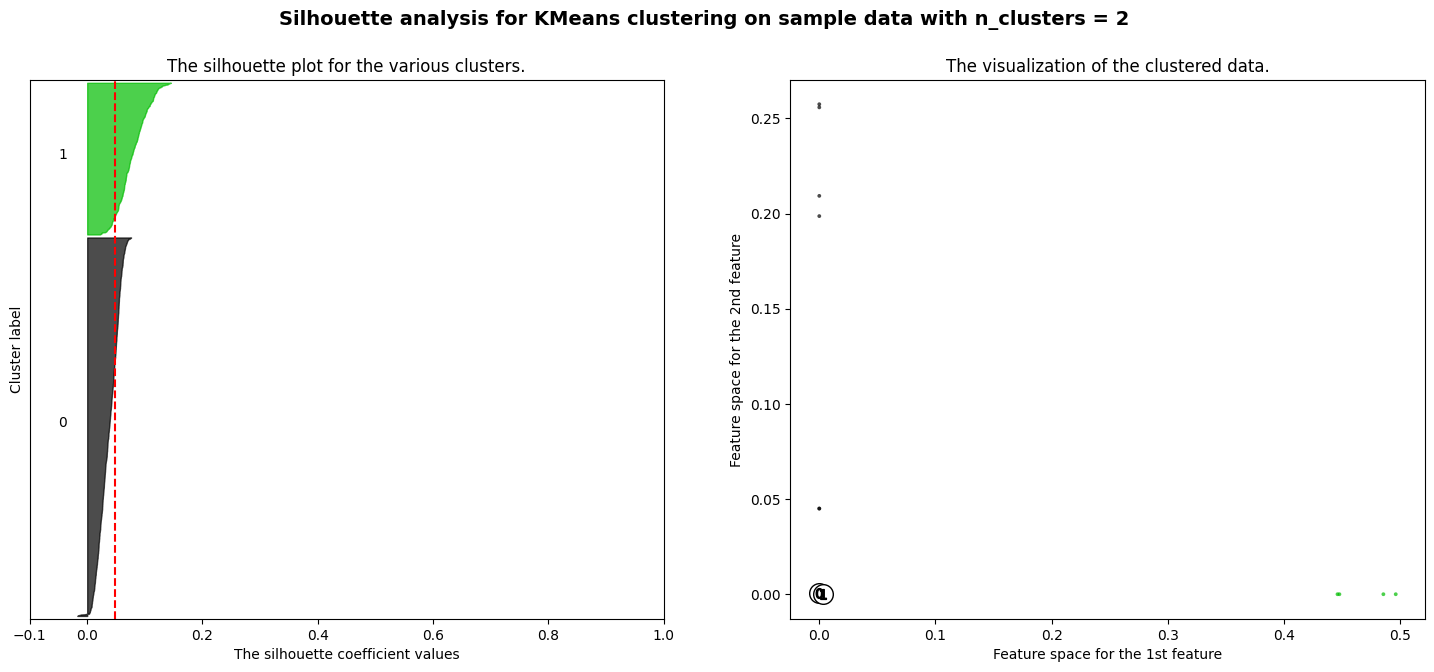

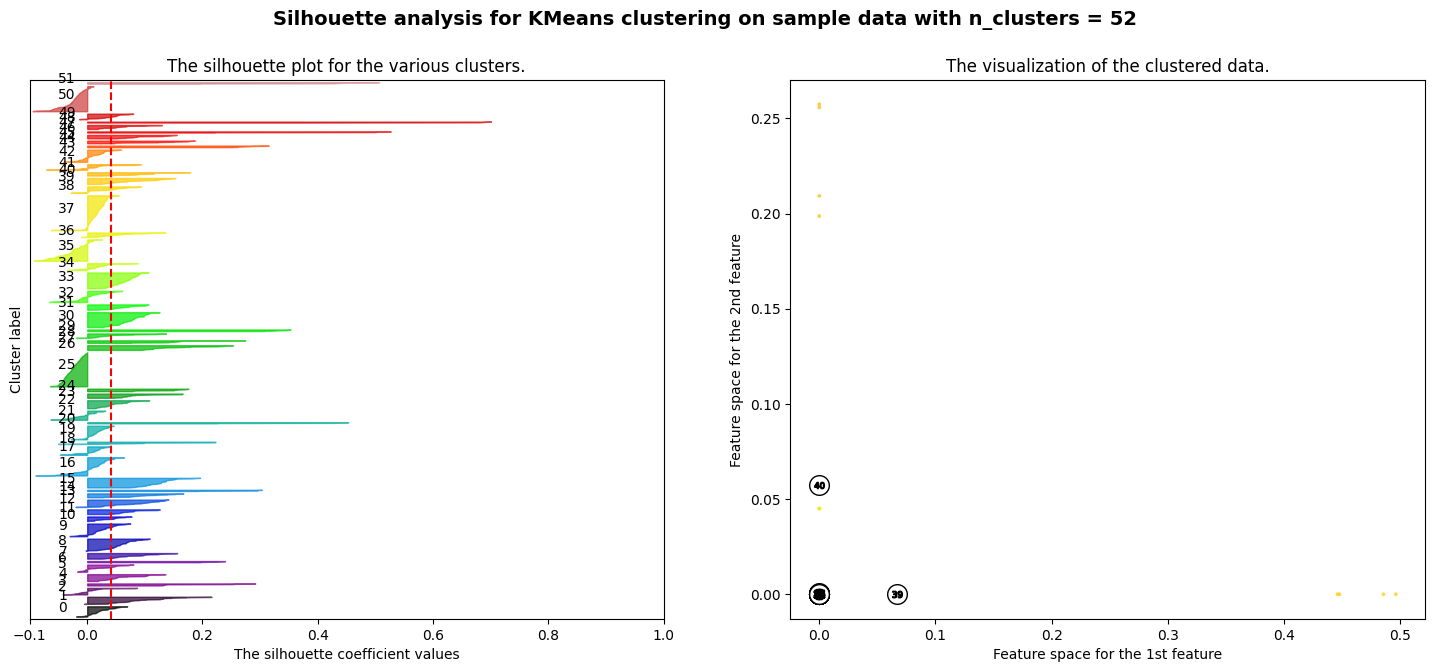

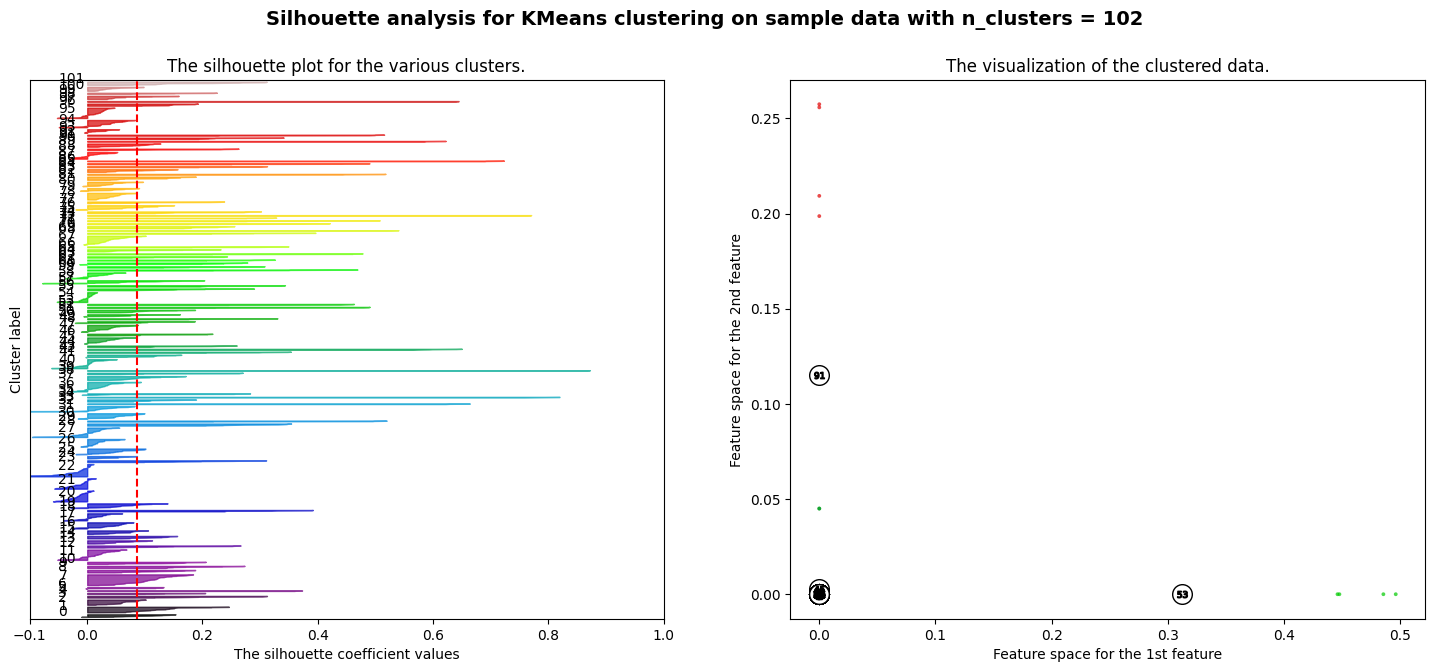

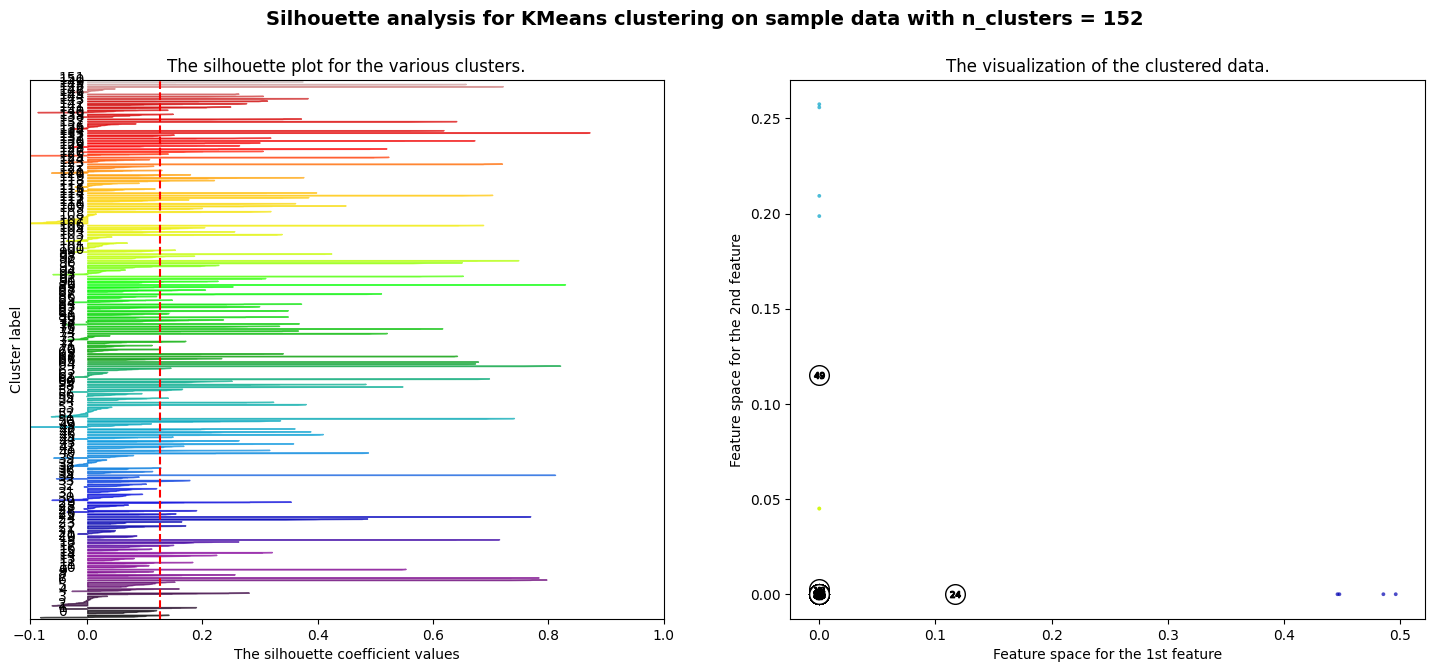

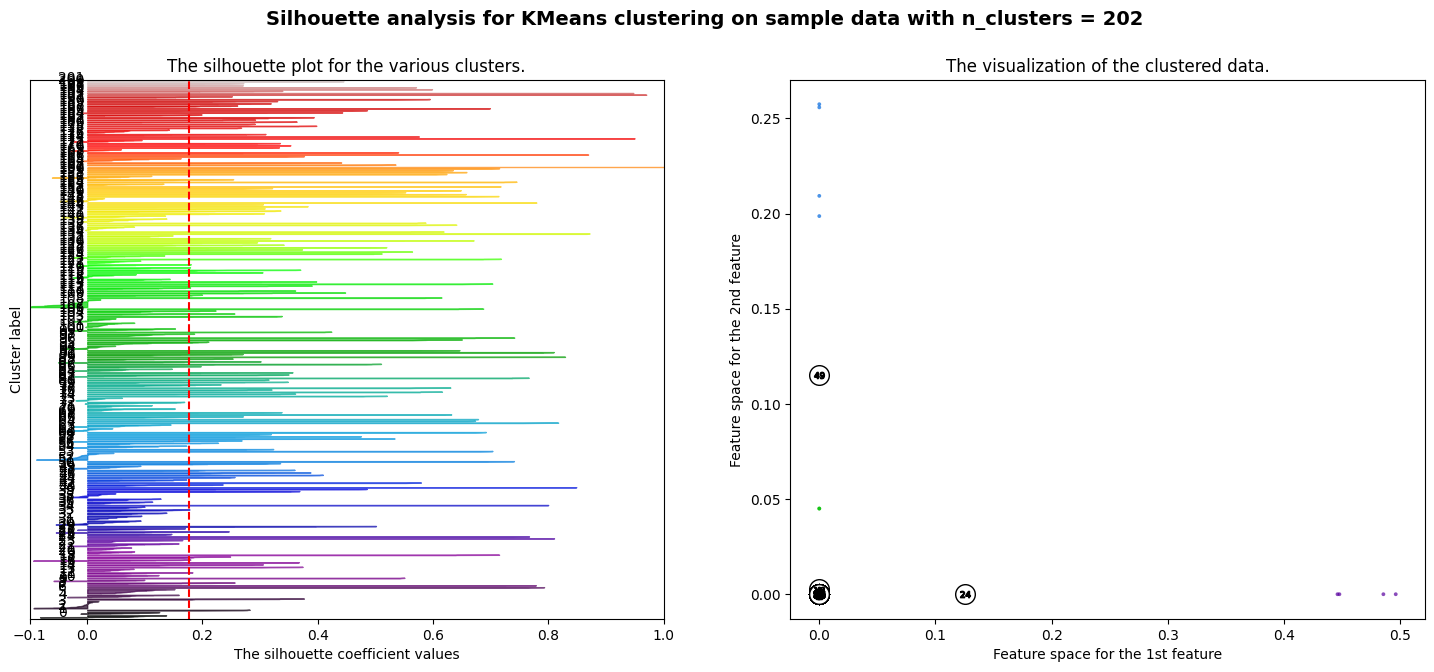

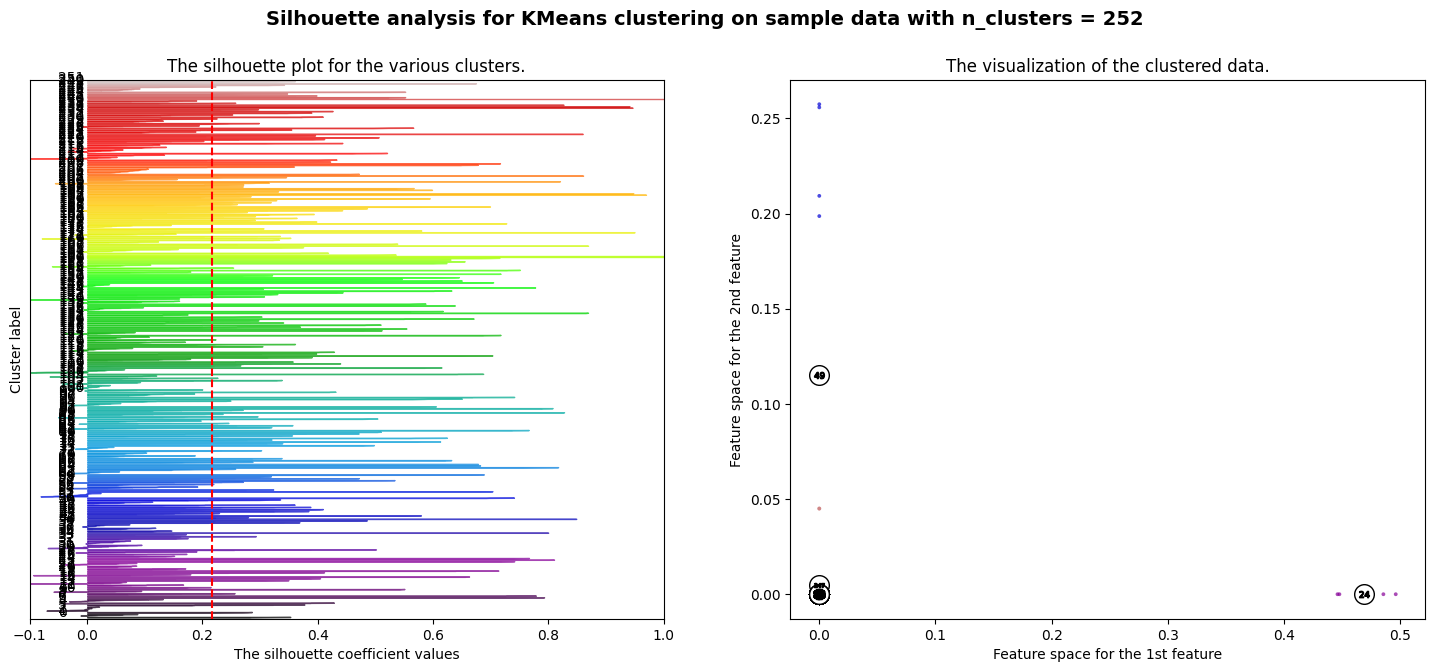

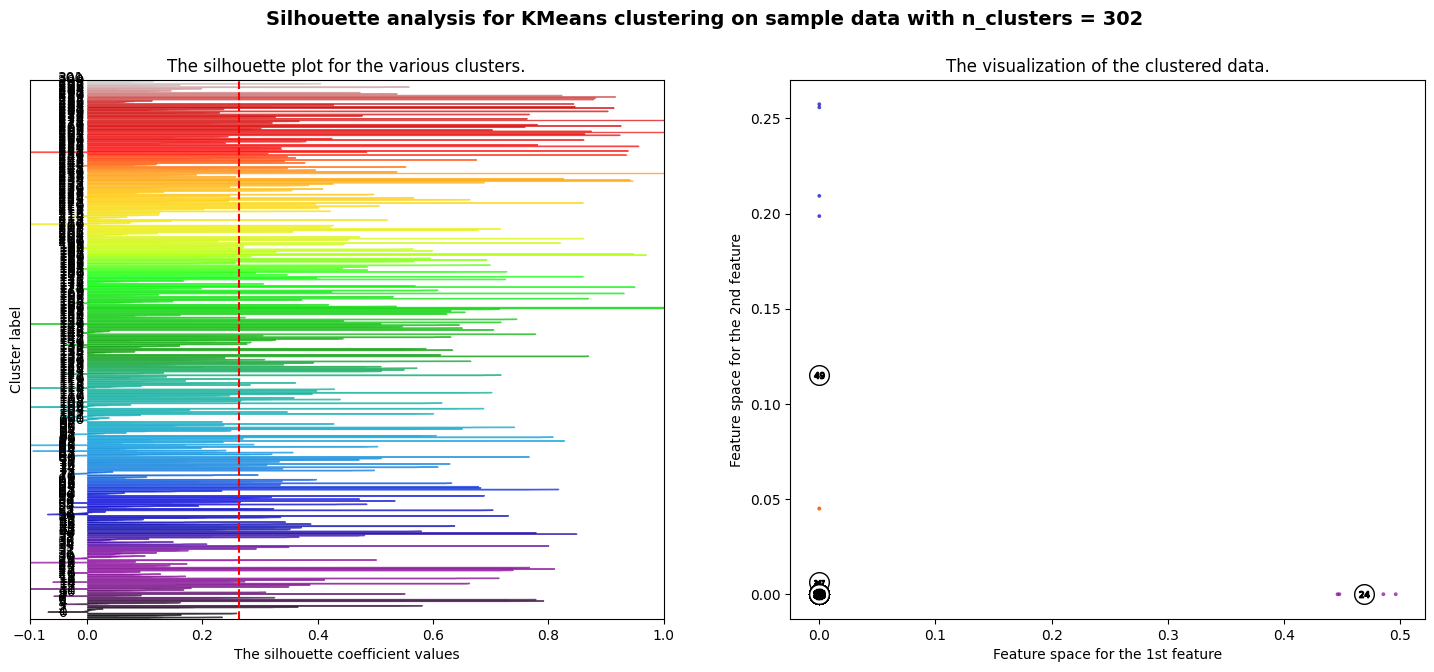

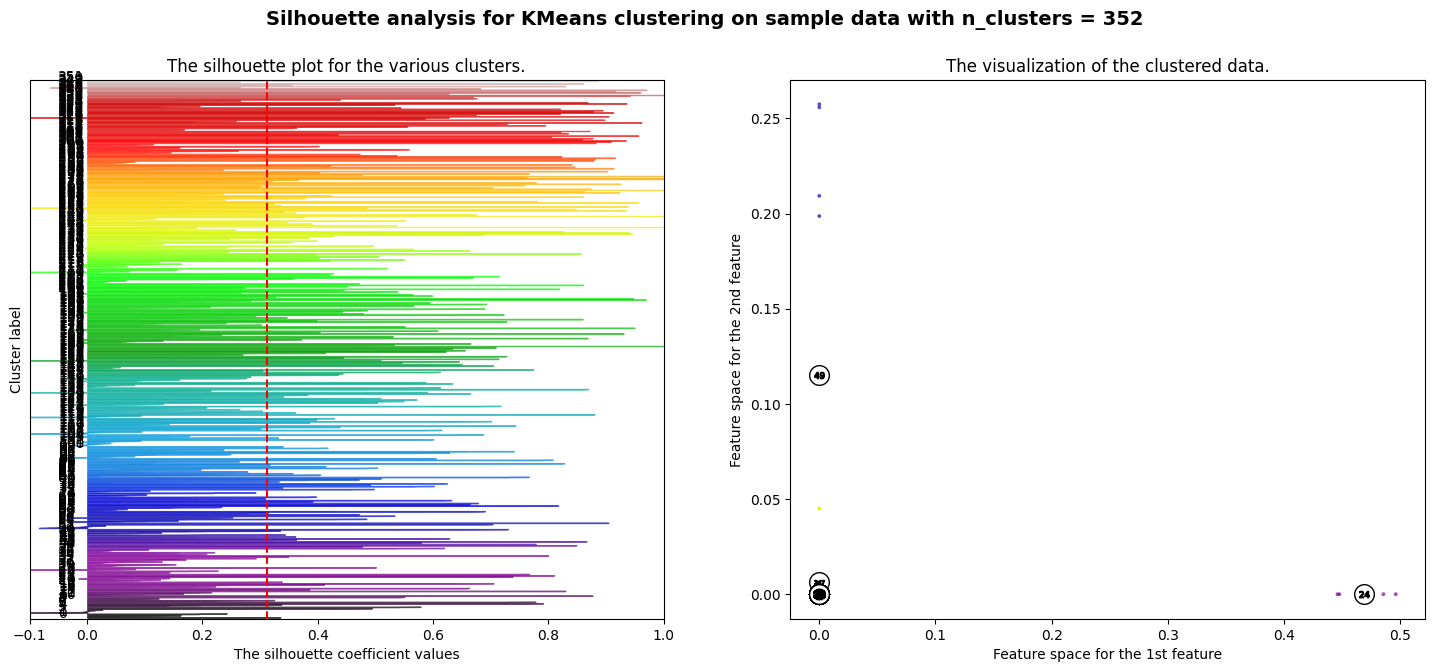

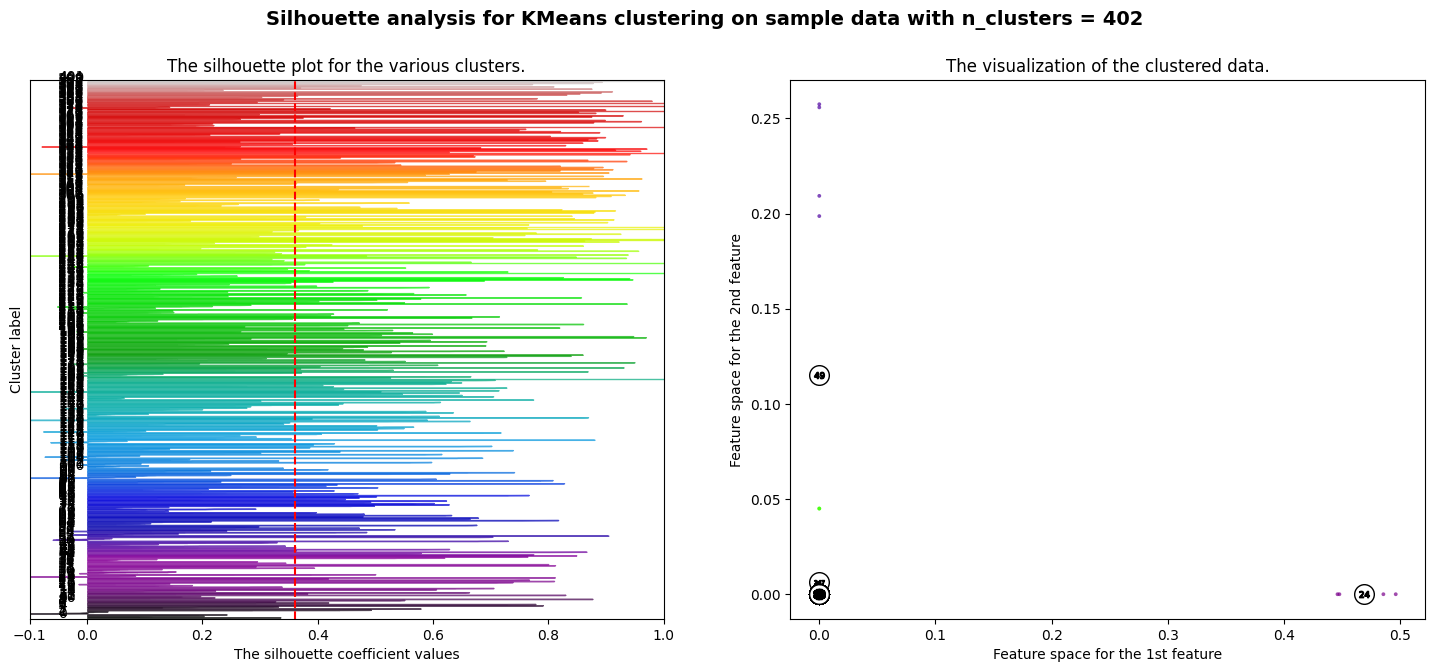

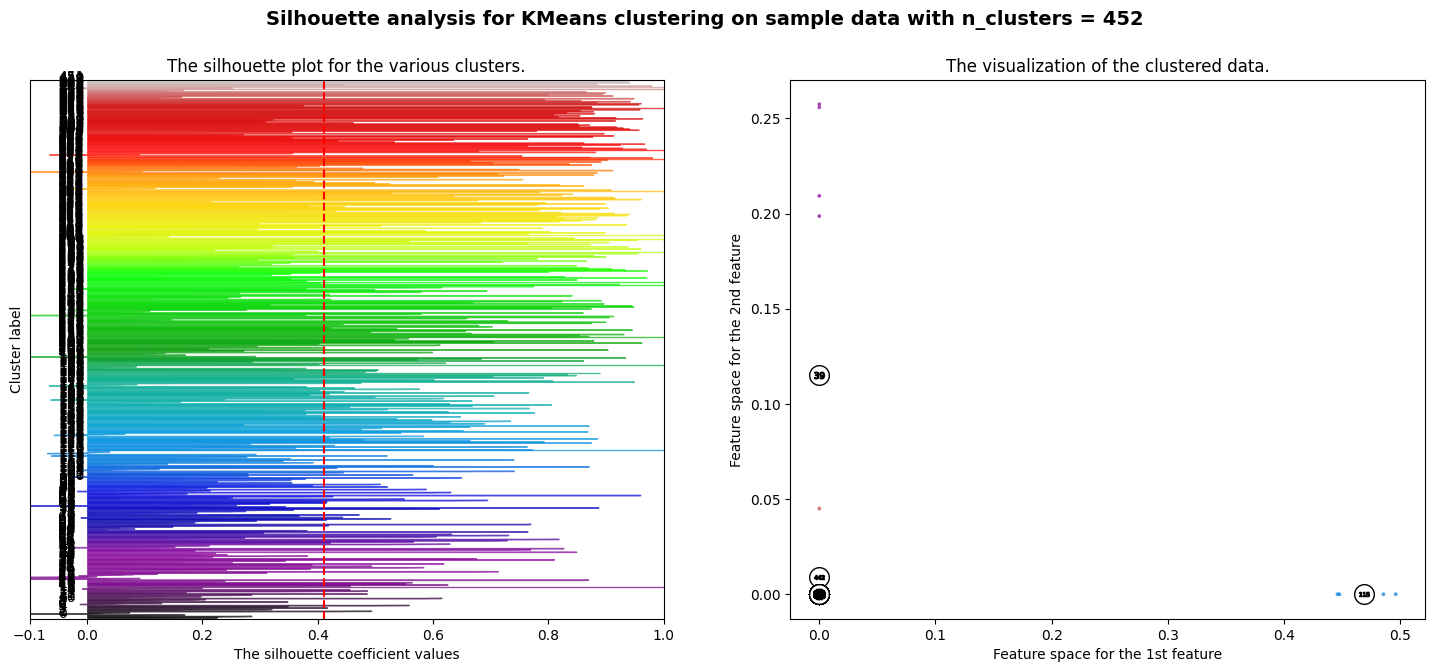

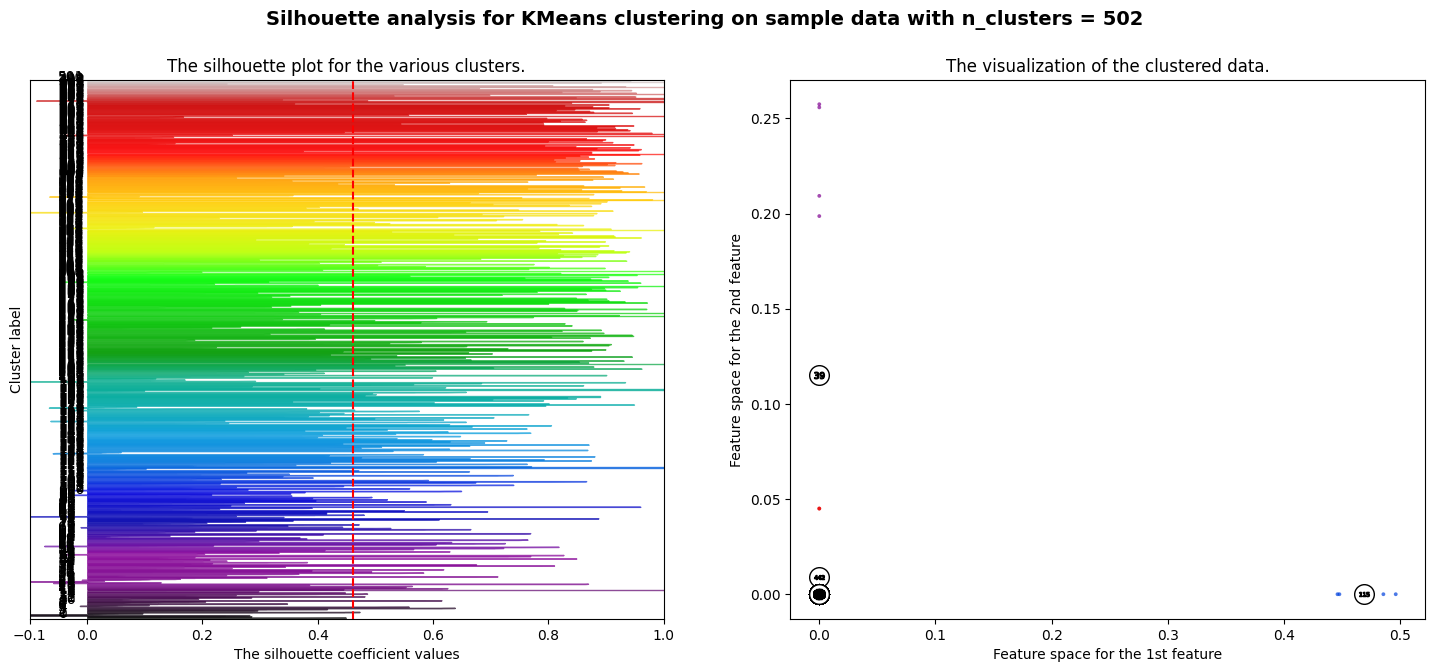

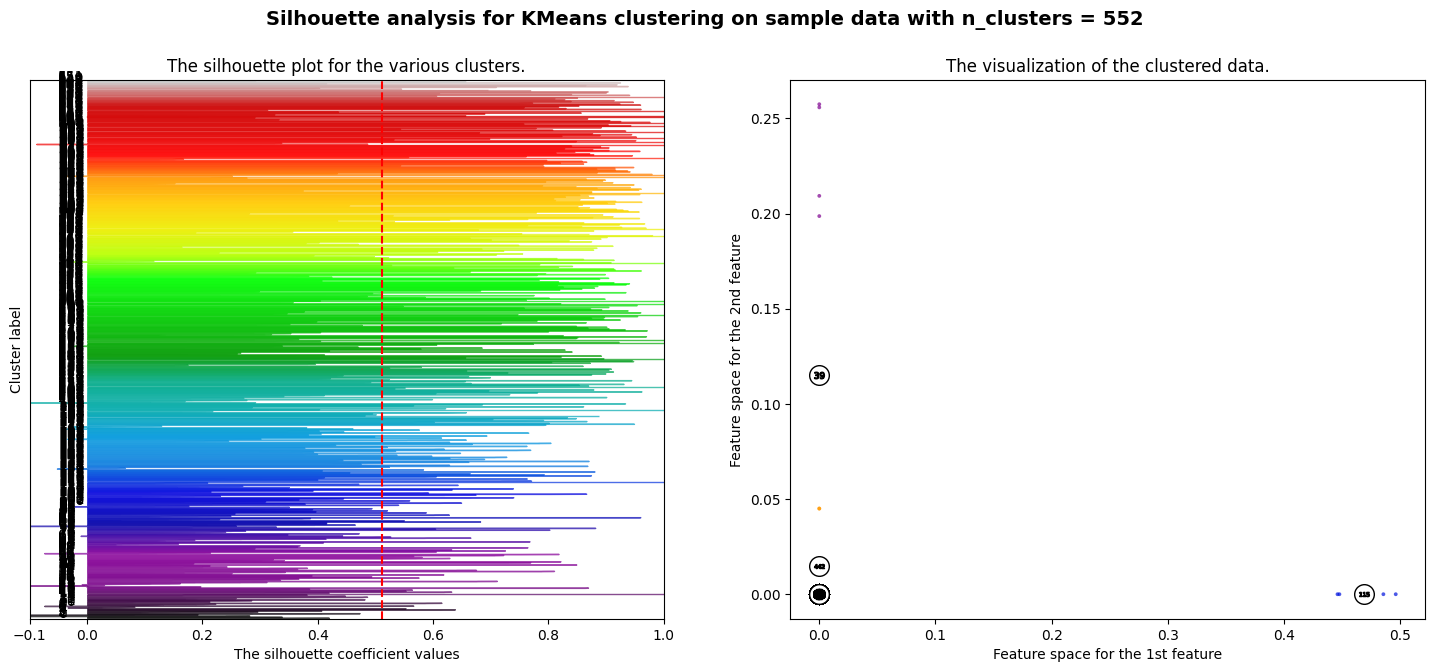

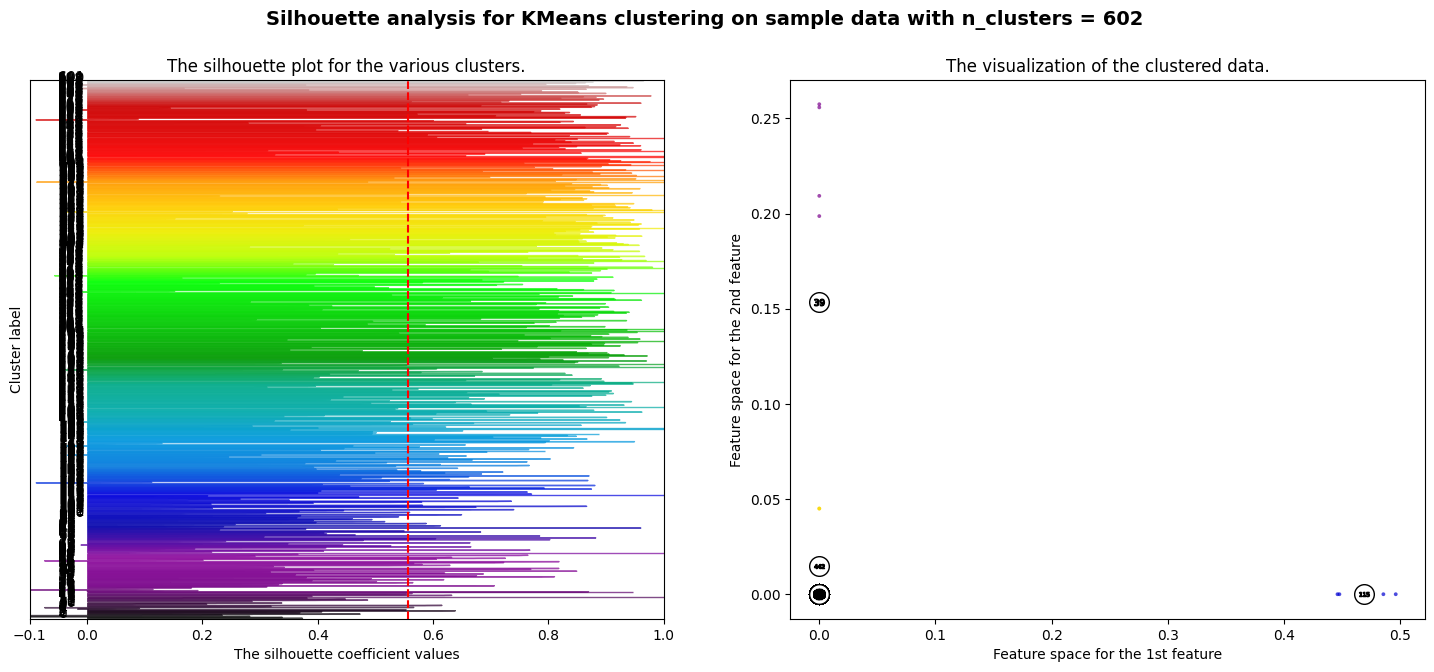

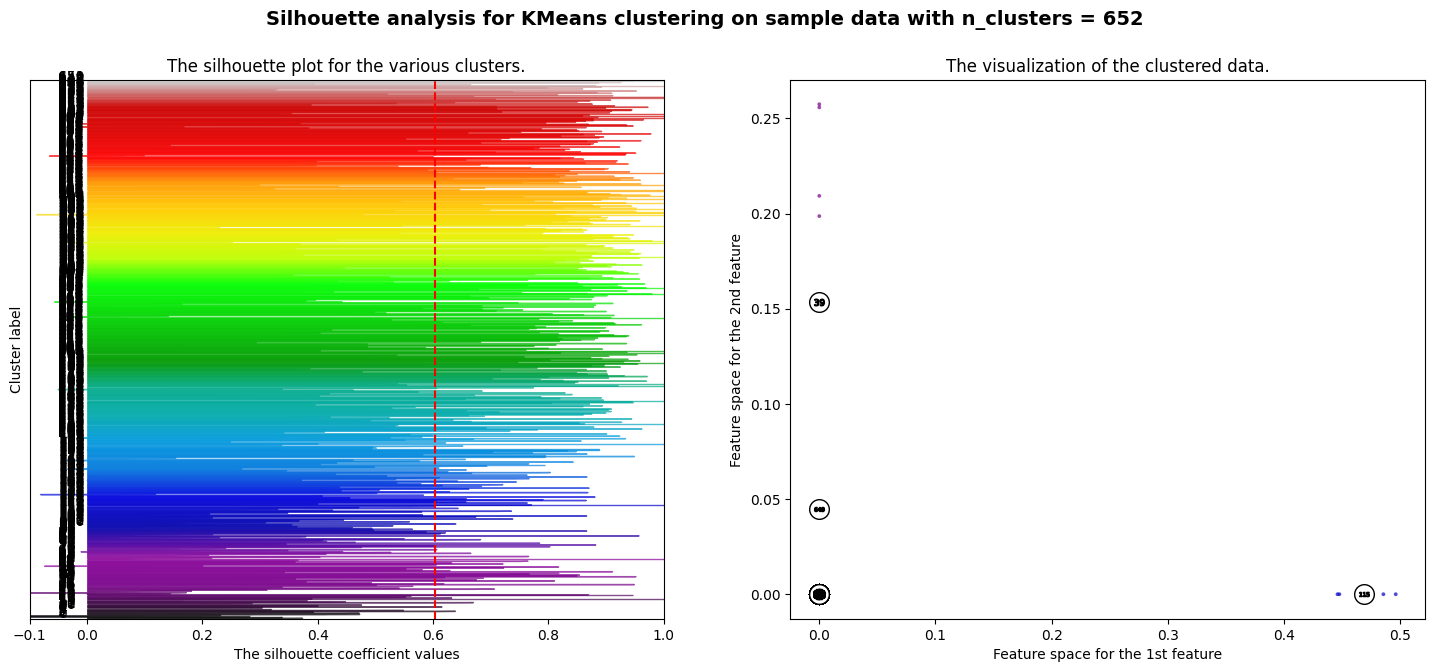

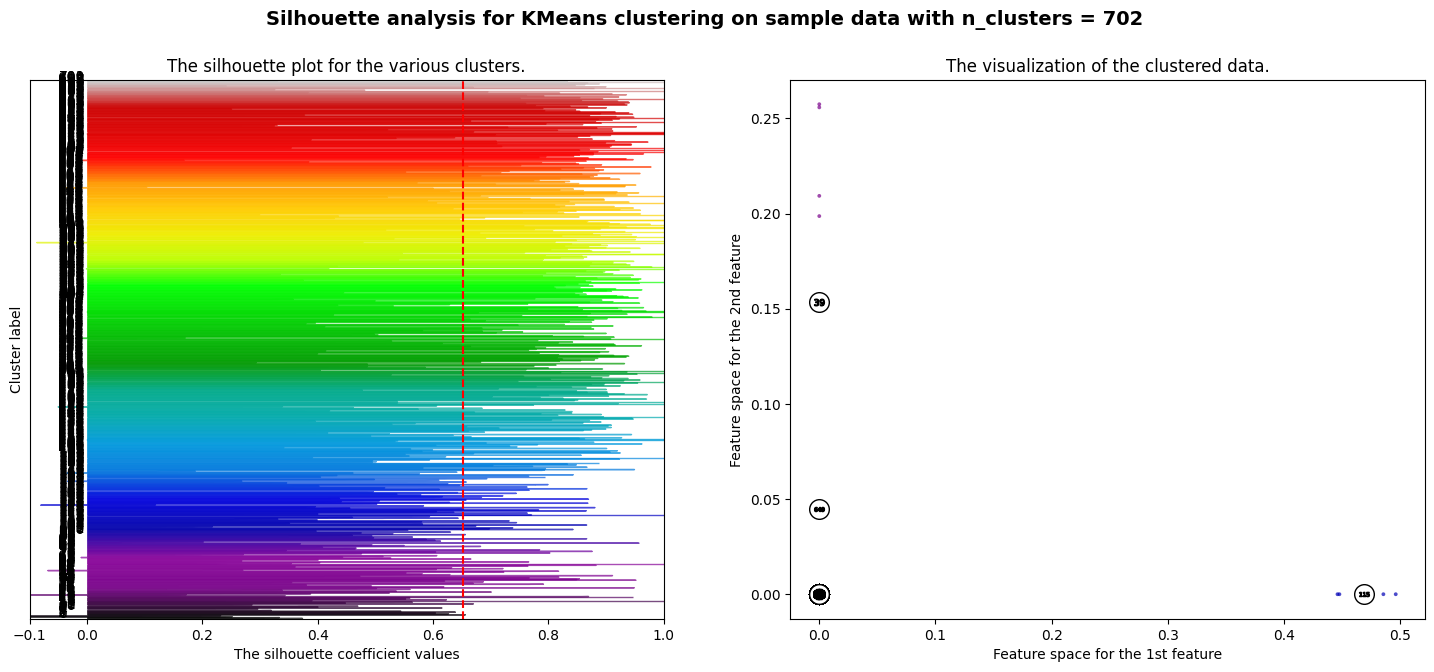

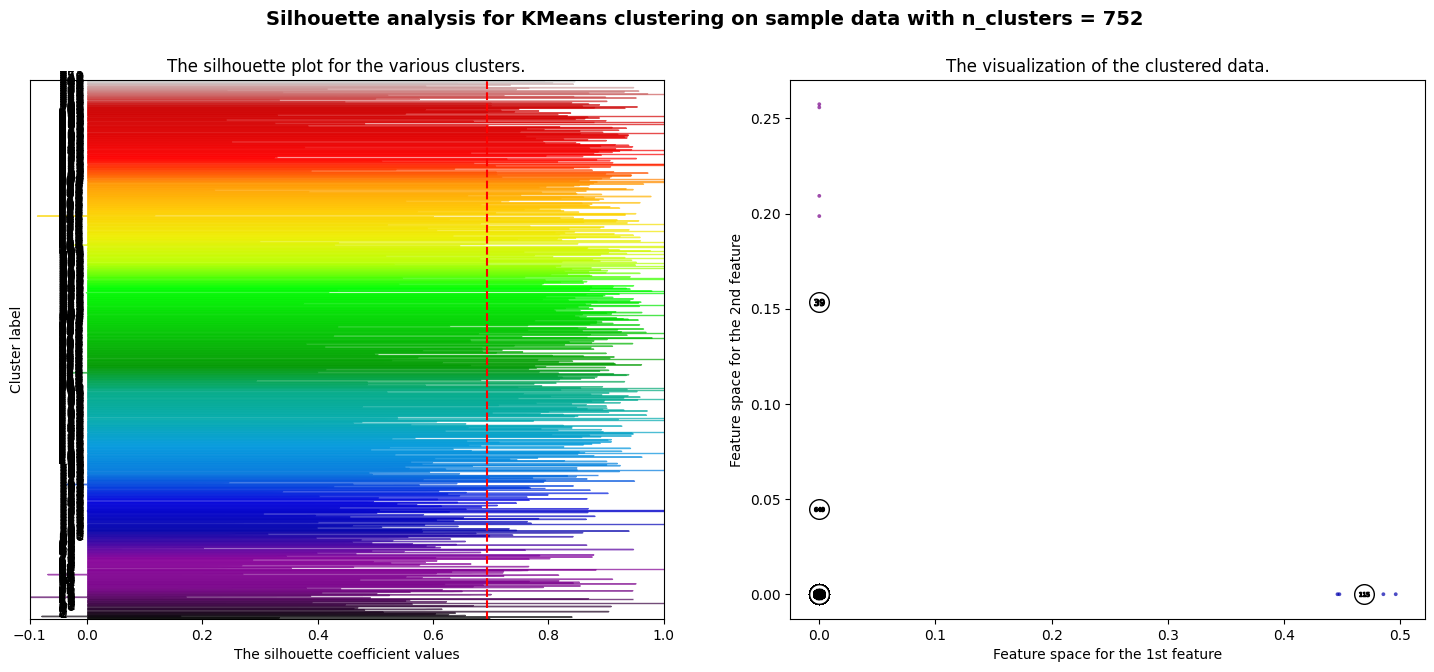

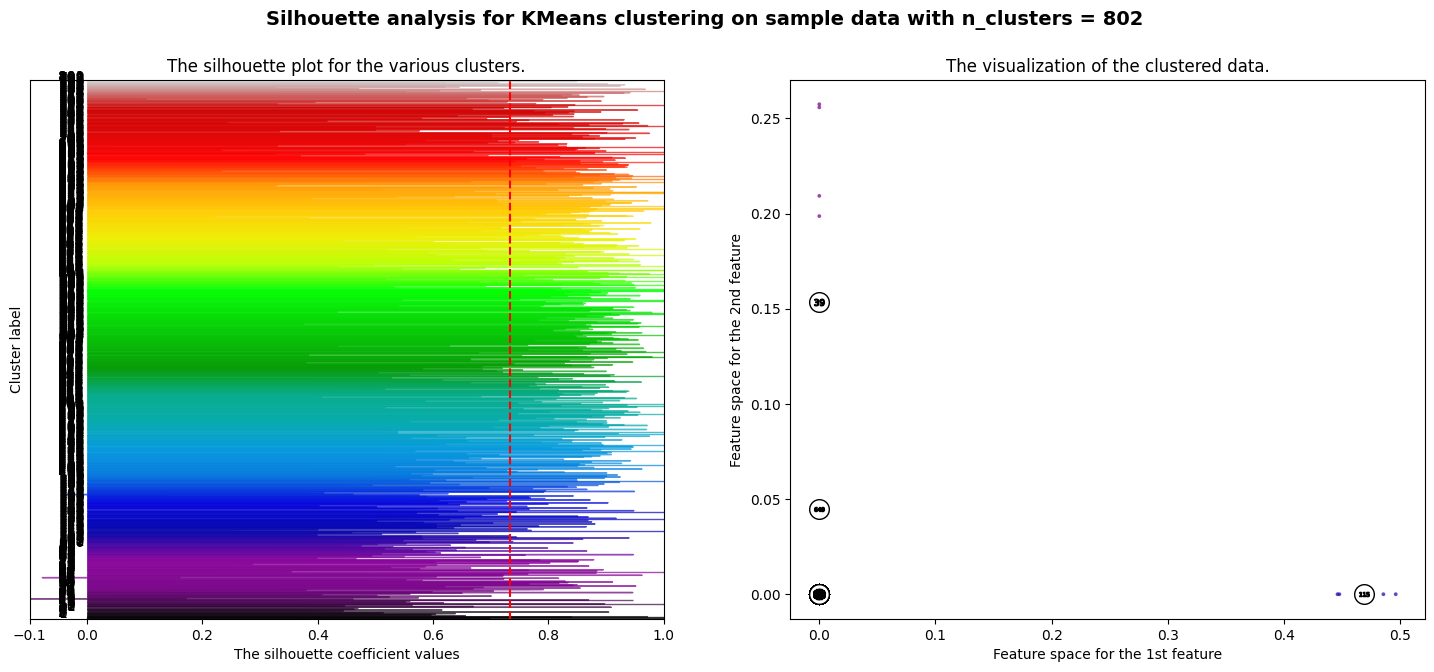

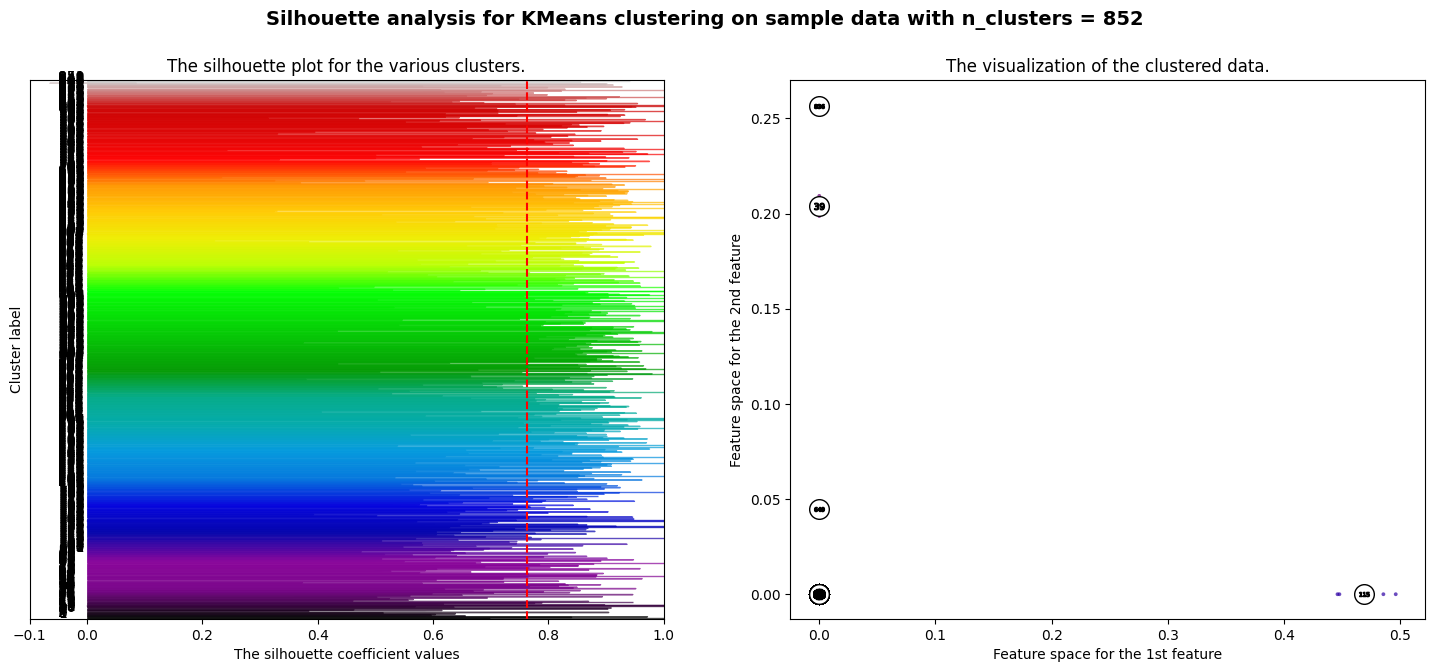

In [ ]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = embeded_texts
range_n_clusters = range(2,1900, 50)

silhouette_scores = {}
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    silhouette_scores[n_clusters] = silhouette_avg

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [11]:
silhouette_scores

{2: 0.048986957941012044,
 12: 0.027708142935453706,
 22: 0.020831532656916056,
 32: 0.028737029790533306,
 42: 0.03297899233708807,
 52: 0.04144204405381804,
 62: 0.05522711694906244,
 72: 0.06186720893350364,
 82: 0.06869226570670015,
 92: 0.0768835379656501,
 102: 0.08661659655393754,
 112: 0.09478584368127907,
 122: 0.1032010357550171,
 132: 0.10902874176169235,
 142: 0.11719309663030776,
 152: 0.12689536083421302,
 162: 0.13753173415394562,
 172: 0.14706283853583493,
 182: 0.1565997958004539,
 192: 0.16605354024925836}

In [12]:
max_key = max(silhouette_scores, key=silhouette_scores.get)
max_value = silhouette_scores[max_key]

print(max_key, max_value)

192 0.16605354024925836


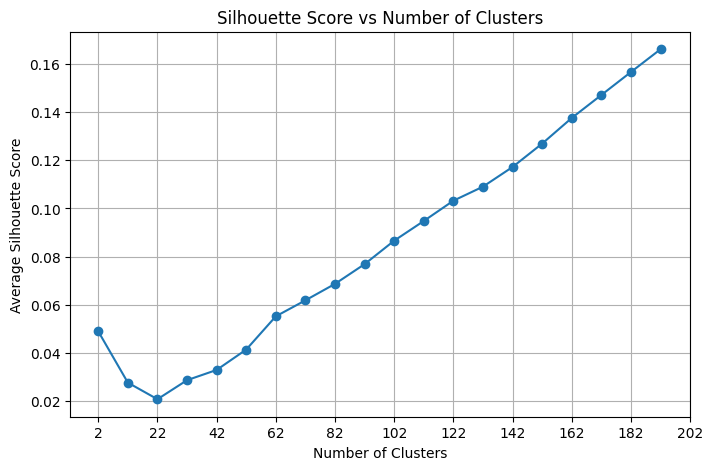

In [13]:
# Extract the number of clusters and the corresponding silhouette scores
clusters = list(silhouette_scores.keys())
scores = list(silhouette_scores.values())

# Plotting the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(clusters, scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.xticks(np.arange(min(clusters), max(clusters)+20, 20)) 
plt.show()
